Problem Statement

To build an application classify the patients to be healthy or suffering from cardio Vascular disease based on the given attributes

In [7]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Normalizing
from sklearn.preprocessing import StandardScaler

#Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('D:/Files-main/Files-main/cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [11]:
#dataset stats
df.shape

(69301, 13)

In [13]:
#drop id and remove duplicates
df.drop('id', axis = 1, inplace = True)

In [14]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#obsevations
#1- No missing values
#2 - age is in number of days
#3 - outliers in height
#4 - outliers in ap_high
#5 - outliers in ap_low
#6 - seems cholestrol ansd glucode are binary. will see in the further analysis

In [16]:
#Duplicates removal
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(69277, 12)

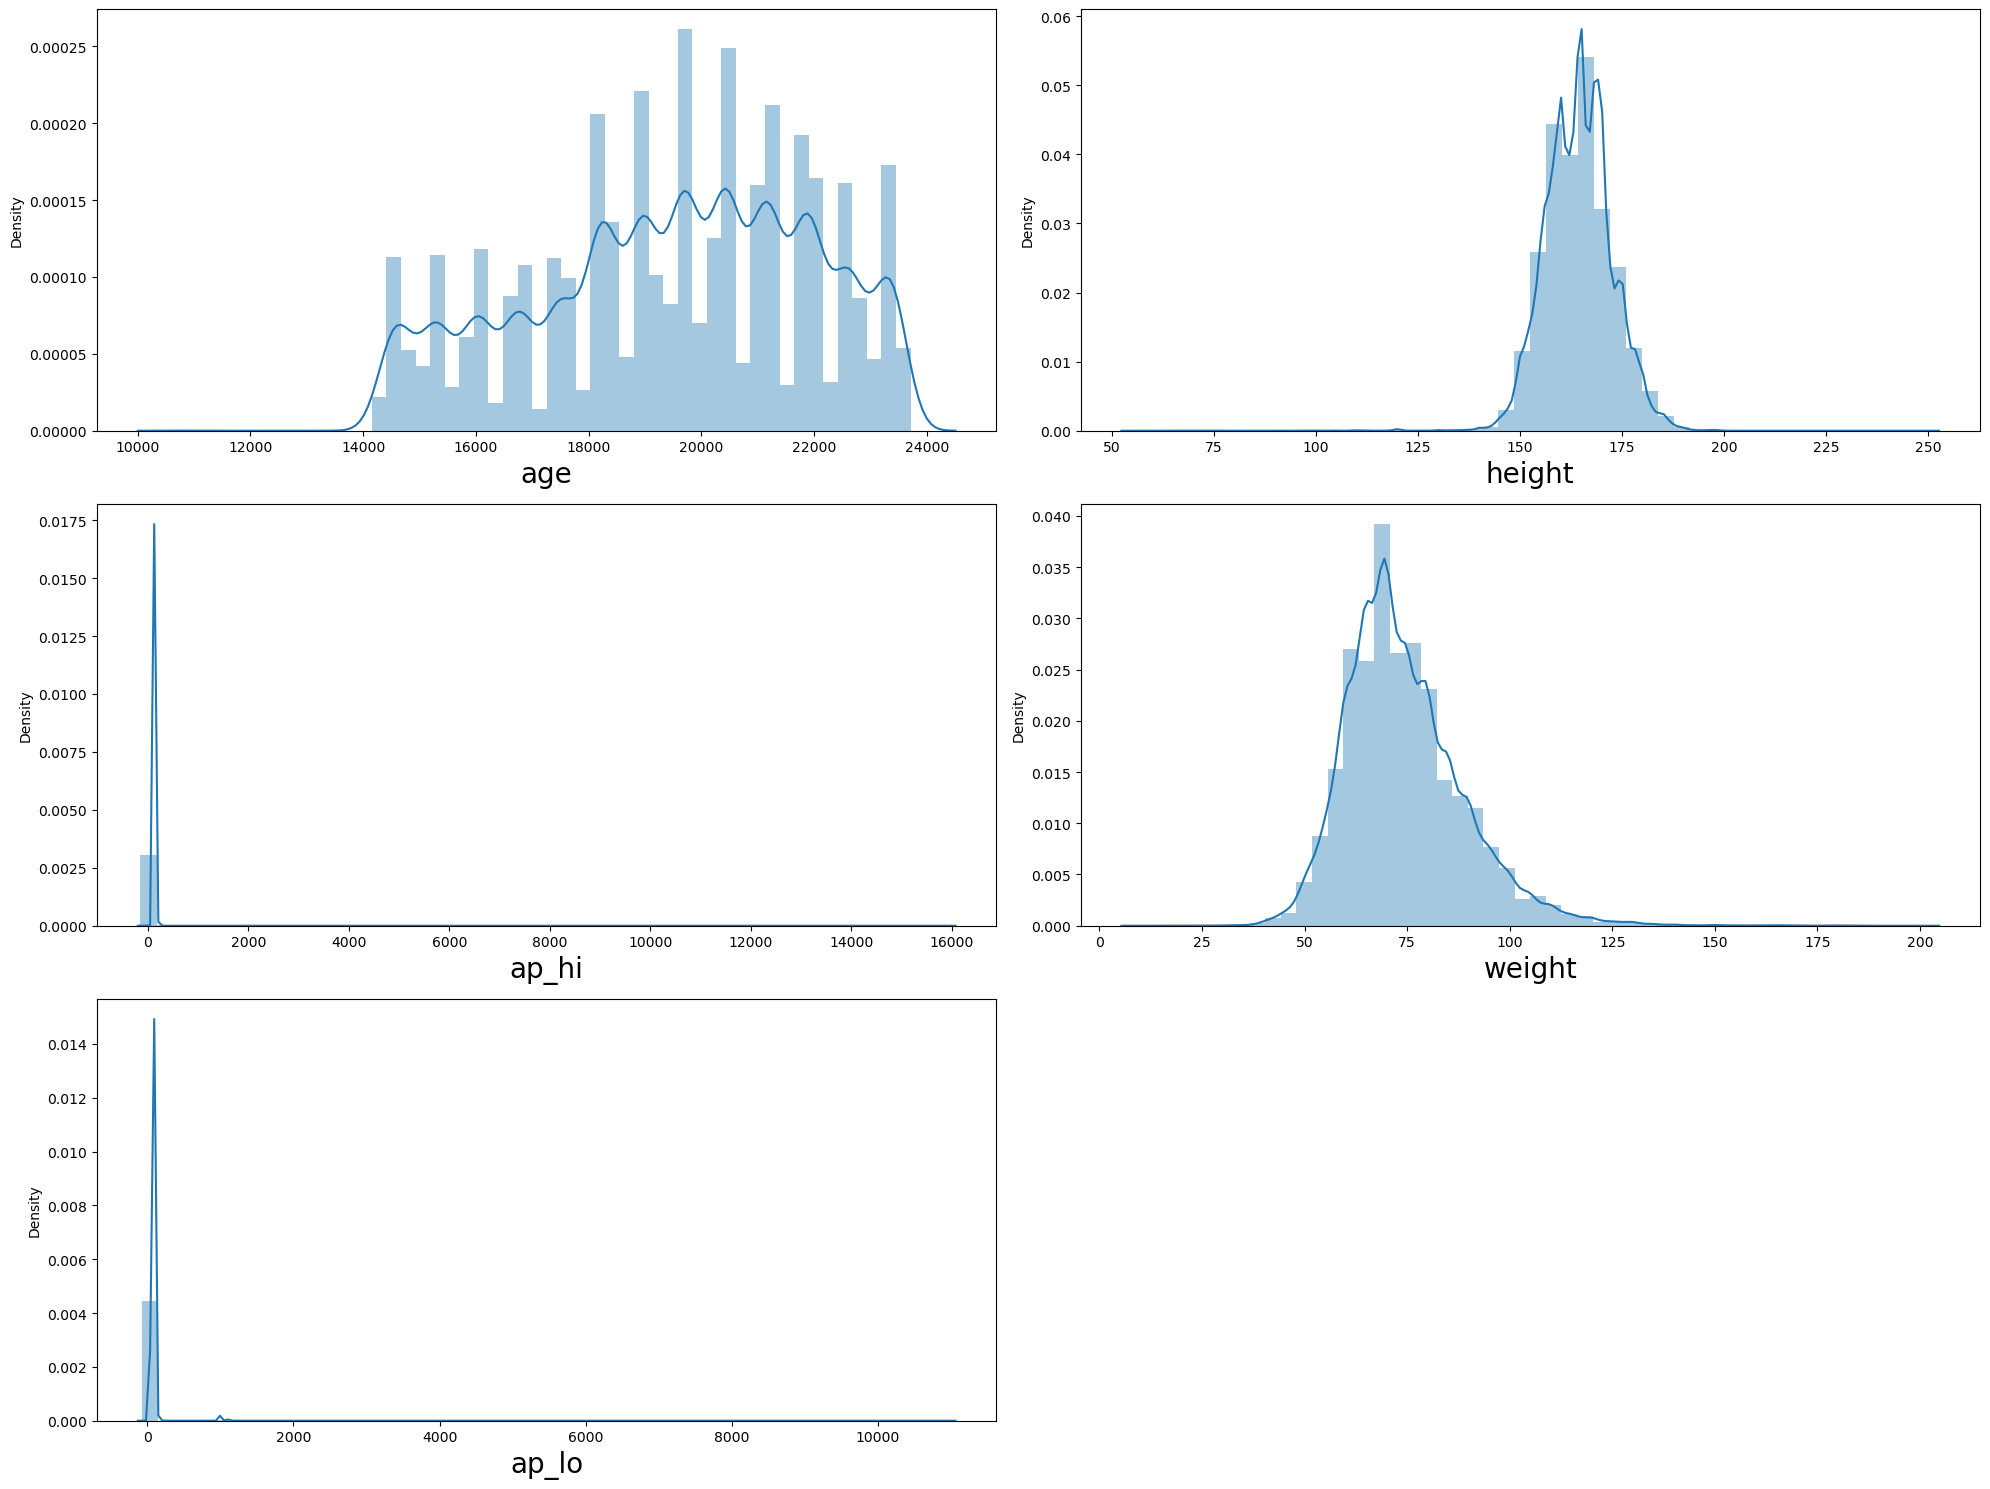

In [21]:
plt.figure(figsize=(20,15))
pltnumber = 1 
for column in df[['age', 'height', 'ap_hi', 'weight', 'ap_lo']]:
    if pltnumber<=6:
        ax = plt.subplot(3,2, pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    pltnumber += 1
plt.tight_layout()

In [26]:
# with std 3 lets see the stats
# from scipy import stats

# z_score = (x-mean)/std => you have seen this in standard scaler)
##z = (x-mean)/std

from scipy.stats import zscore 

z_score = zscore(df[['age', 'height', 'ap_hi', 'weight', 'ap_lo']])
abs_z_score = np.abs(z_score)# applyu the formula and get the scaled data

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


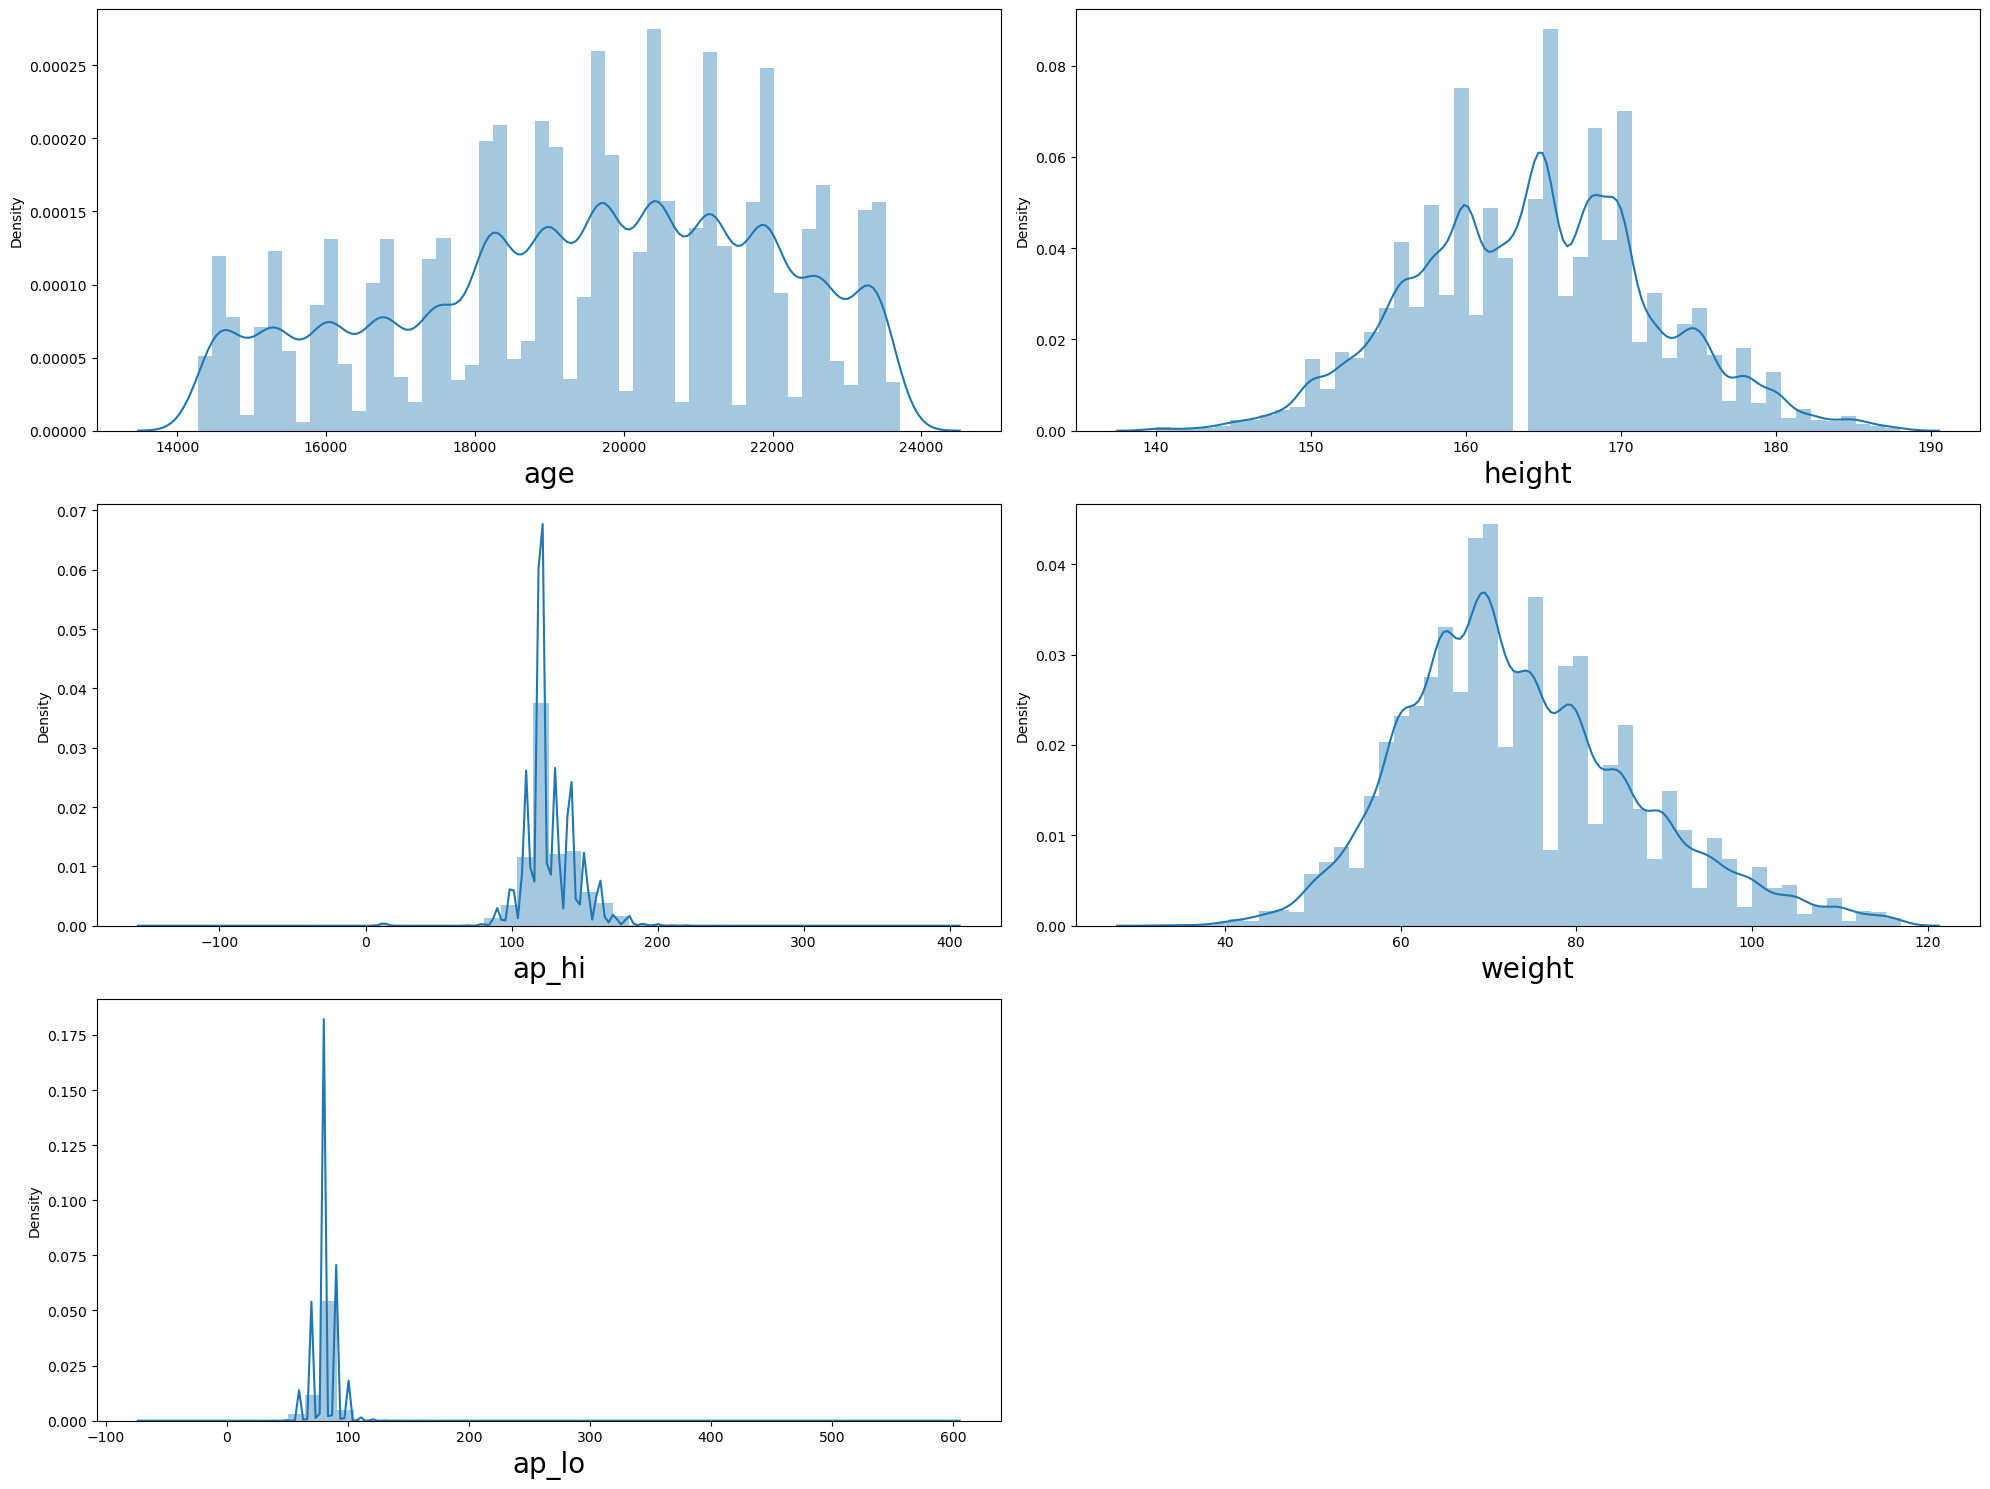

In [30]:
plt.figure(figsize=(20,15))
pltnumber = 1 
for column in df[['age', 'height', 'ap_hi', 'weight', 'ap_lo']]:
    if pltnumber<=6:
        ax = plt.subplot(3,2, pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    pltnumber += 1
plt.tight_layout()

In [31]:
# cannot make out much from the above plots. Lets build the model
x = df.drop(columns = ['cardio'], axis = 1)
y = y = df['cardio']

In [32]:
# Split into train test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 41)

In [37]:
# Model Confidence/ accuracy
def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n====================Train Score ======================')
        print(f'Accuracy Score : {accuracy_score(y_train, y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n====================Train Score ======================')
        print(f'Accuracy score : {accuracy_score (y_test, pred)*100:.2f}%')
        
        print('\n\n Test Calssification Report\n', classification_report(y_test, pred, digits = 2))

In [35]:
# Initiate RandomForestClassifier and train
random_clf = RandomForestClassifier()

#train the model
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
# call the function and pass dataset to check train and test score
metric_score(random_clf, x_train, x_test, y_train, y_test, train = True) # score of training data

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False) # score of test data


====================Train Score ======================
Accuracy Score : 99.98%

====================Train Score ======================
Accuracy score : 71.05%


 Test Calssification Report
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.71      0.69      0.70      9965

    accuracy                           0.71     20208
   macro avg       0.71      0.71      0.71     20208
weighted avg       0.71      0.71      0.71     20208



Let's Tune the parameters using GridSearchCV

In [50]:
#RandomForestClassifier
params = {'n_estimators':[50,80],
          'criterion':['entropy','gini'],
          'max_depth':[25, 30],
          'min_samples_split':[15, 16],
          'min_samples_leaf':[5, 6]
         }

grd = GridSearchCV(random_clf, param_grid = params)
grd.fit(x_train, y_train)

print('best_params =>', grd.best_params_)

best_params => {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 80}


In [48]:
random_clf = grd.best_estimator_ # reintantiating with best params

random_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [49]:
# call the function and pass dataset to check train and test score
metric_score(random_clf, x_train, x_test, y_train, y_test, train = True) 

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False)


====================Train Score ======================
Accuracy Score : 74.68%

====================Train Score ======================
Accuracy score : 73.24%


 Test Calssification Report
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10243
           1       0.75      0.68      0.71      9965

    accuracy                           0.73     20208
   macro avg       0.73      0.73      0.73     20208
weighted avg       0.73      0.73      0.73     20208

